# TUTORIAL ON THE LORENZ 63 SYSTEM

We'll take a brief look at the L63 system, its response to forcing, its dynamical properties in terms of weather regimes, and making predictions.

There are innumerable references and videos and tutorials about this system online. You can find them with a quick Google. For the same reason, this is one of those situations where you can get good mileage out of using ChatGPT or similar. You might find them a helpful assistant when playing around with this tutorial.

You'll only need some standard python packages.

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import stats
import matplotlib.pyplot as plt

# 1. Playing with the equations

## First let's just get some code to integrate the equations and generate a simulation.

In [2]:
# Define the basic Lorenz 63 system
def lorenz63(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [3]:
# Parameters for the Lorenz 63 system: these are the standard choices.
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Define some initial condition to start at.
initial_conditions = [0.0, 1.0, 0.0]

# Set the timestep and the total timespan to integrate over. In this case, we integrate 50,000 timesteps
# over a time variable ranging from 0 to 40.
t_span = (0, 40)
t_eval = np.linspace(*t_span, 50000)


# Integrate the system using solve_ivp from scipy
sol = solve_ivp(lorenz63, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta))

# Extract the solution
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]


## Now we want to visualise the attractor.

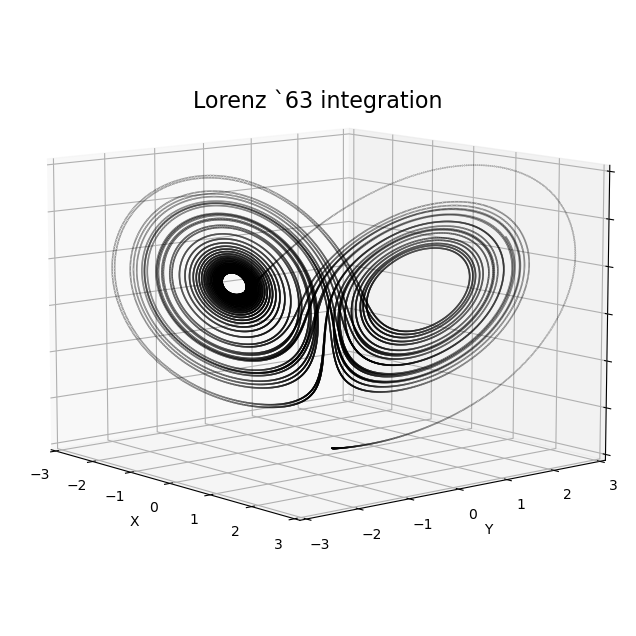

In [4]:
# Normalise the dimensions.
xn = x/x.std()
yn = y/y.std()
zn = z/z.std()


elev = 10
azim = -40
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xn, yn, zn, c='k', s=0.05, alpha=0.6)  # Adjust s for point size
ax.view_init(elev=elev, azim=azim)
ax.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.zaxis.set_tick_params(labelbottom=False)
ax.set_title('Lorenz `63 integration', y=0.9, fontsize=16)


plt.show()

## Exercise 1.

Play around with giving different initial conditions, changing length of integration or timesteps etc. to get a feel for the behaviour.

If you haven't done so already, you can paly around similarly with the following interactive website: https://joshdorrington.github.io/L63_simulator/

Click anywhere on the attractor to initiate a trajectory starting there.

# 2. Loading in precomputed data

When playing around you may have noticed that the exact outcome you get is somewhat unstable. Of course, there is chaos in the system, so you expect sensitivity to initial conditions, but you might have expected 50,000 samples to be sufficient to obtain some kind of convergence.

Unfortunately that's not the case! In order to get some kind of convergence you need millions of samples, due to the fractal nature of the attractor. Rather than crunch those on your laptop, we'll load in some pre-made data, courtesy of Josh Dorrington. This data was obtained by running a very, very long integration, and then subsampling from it.

This will make life much easier.

In [5]:
# We'll only extract 50,000 samples. Exclude the early part to avoid the initial trajectory where the path settles
# onto the attractor. We only care about the attractor itself.

l63_data = np.load('./data/r0_0_L63.npy')[5000:50000+5000,:] 

x = l63_data[:,0]
y = l63_data[:,1]
z = l63_data[:,2]

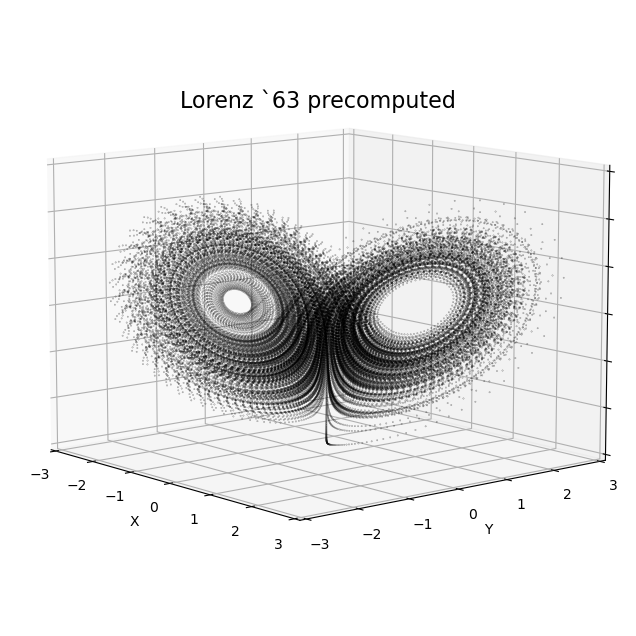

In [6]:
# Let's visualise like before.

# Normalise the dimensions.
xn = x/x.std()
yn = y/y.std()
zn = z/z.std()


elev = 10
azim = -40
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)

fig = plt.figure(figsize=(10, 8))


ax = fig.add_subplot(111, projection='3d')
ax.scatter(xn, yn, zn, c='k', s=0.05, alpha=0.6)  # Adjust s for point size
ax.view_init(elev=elev, azim=azim)
ax.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.zaxis.set_tick_params(labelbottom=False)
ax.set_title('Lorenz `63 precomputed', y=0.9, fontsize=16)


plt.show()

## Beautiful! Let's look at it from another angle.

Just to make it clear that there's more to this than meets the eye.

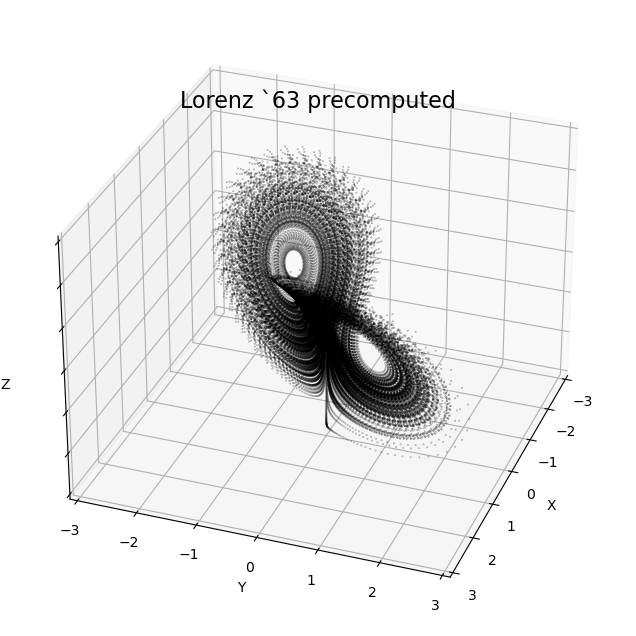

In [147]:
elev = 30
azim = 20
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)

fig = plt.figure(figsize=(10, 8))


ax = fig.add_subplot(111, projection='3d')
ax.scatter(xn, yn, zn, c='k', s=0.05, alpha=0.6)  # Adjust s for point size
ax.view_init(elev=elev, azim=azim)
ax.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.zaxis.set_tick_params(labelbottom=False)
ax.set_title('Lorenz `63 precomputed', y=0.9, fontsize=16)


plt.show()

## Exercise 2.

Play around with viewing it from different angles. If you run a plt.show() directly from a python script (or ipython) to get the figure as a pop-up window, you can rotate it manually.

# 3. The two regimes and their response to forcing.

The two wings are often interpreted as two regimes. These wings are almost trivially extracted using something like persistent homology, which sees the two holes easily (modulo the caveats raised in Strommen et al. 2023).

It's possible to realise them within a bimodal distribution, but it's a bit awkward. The two wings are roughly corresponding to x>0 or x<0. Let's try plotting a histogram of x.

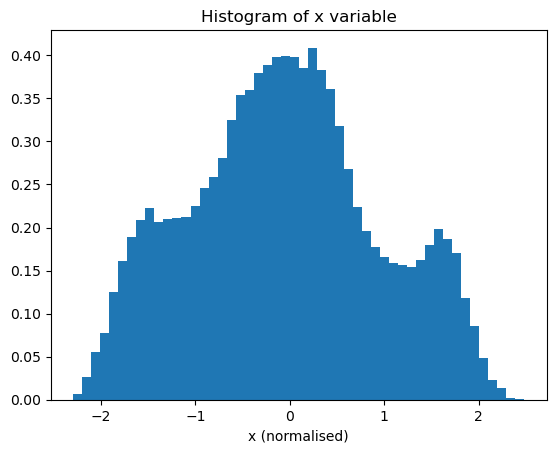

In [55]:
fig = plt.figure()
plt.hist(xn,50, density=True)
plt.title('Histogram of x variable')
plt.xlabel('x (normalised)')
plt.show()

You can see that there are three peaks here. Two of them correspond to the wings, but the central one corresponds to the dense center. To clarify this more let's look at the density of the dataset.

NB: The computation of the density is a little slow.

In [15]:
# Estimating the density with a Gaussian kernel density estimator (KDE).

# We need to stick the dataset into a vector of the shape required for the KDE.
X = np.vstack([xn,yn, zn])

kde = stats.gaussian_kde(X)
density = kde(X)

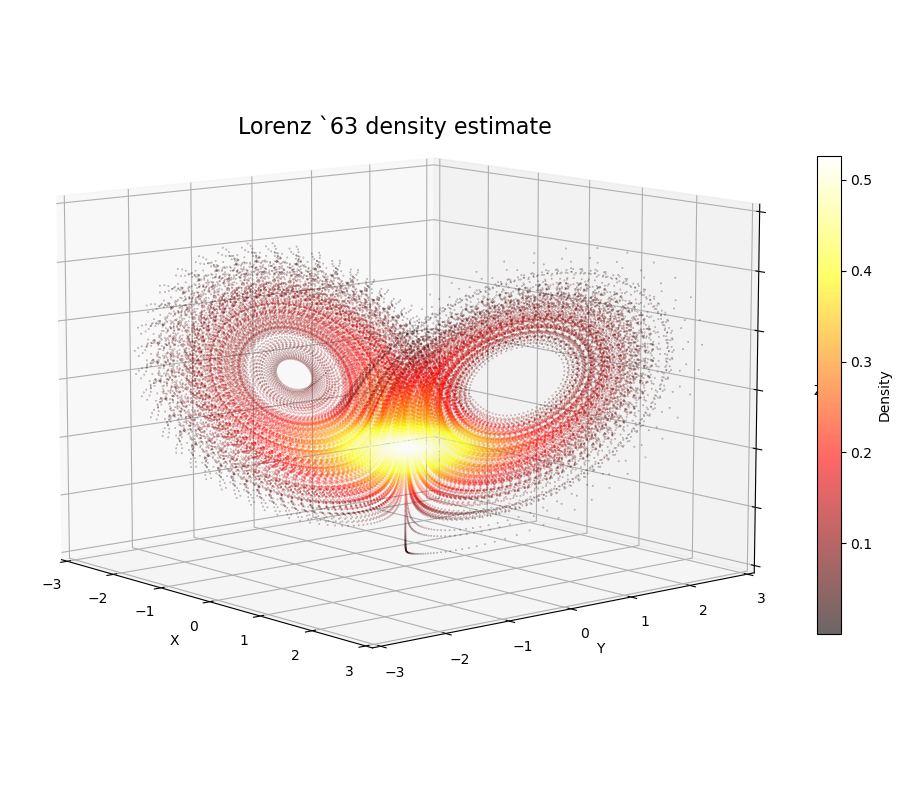

In [80]:
elev = 10
azim = -40
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)

fig = plt.figure(figsize=(10, 8))


ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xn, yn, zn, c=density, cmap='hot', s=0.05, alpha=0.6)  # Adjust s for point size
ax.view_init(elev=elev, azim=azim)
ax.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.zaxis.set_tick_params(labelbottom=False)
ax.set_title('Lorenz `63 density estimate', y=0.9, fontsize=16)

cb = plt.colorbar(p,fraction=0.026, pad=0.04)
cb.set_label('Density')

plt.tight_layout()
plt.show()

You can see that the density peaks strongly in the central region. So should we think of the central bit as its own regime? The basic histogram seems to suggest yes, but our more qualitative understanding says no. The density is higher near the center because the system is more stable and slower moving there, and thus spends extra time there before whizzing off around one of the two wings. We want to think of this central region as a 'neutral' state in some sense. We'll see in a moment that this is also more consistent with the way the system responds to the introduction of a forcing term.

Note that it's possible to recover a cleanly bimodal histogram if you do some time averaging, as noted in Corti, Molteni and Palmer 1999 (https://doi.org/10.1038/19745)

In [53]:
# Function to do an N-step running average of x
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

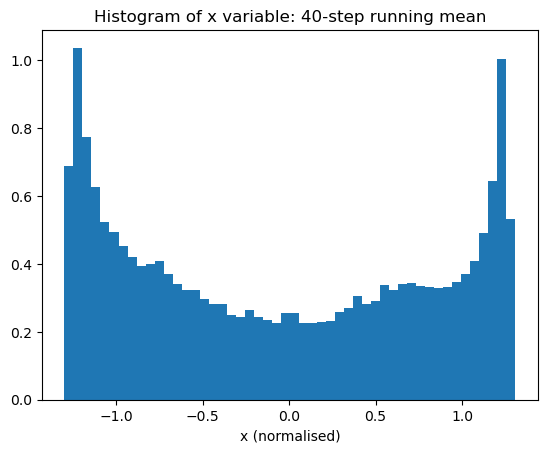

In [62]:
N = 40

fig = plt.figure()
plt.hist(running_mean(xn,N), 50, density=True)
plt.title('Histogram of x variable: %s-step running mean' % N)
plt.xlabel('x (normalised)')
plt.show()

But this is clearly a bit awkward, and you'll note that if you vary the averaging scale (N in the above) then the bimodality quickly disappears. Part of this is related to the more complex shape you will have gleaned from Exercise 2. Possibly there is a particular change of basis (x,y,z)-->(x',y',z') for which the histogram of x' is bimodal with no averaging needed (optional exercise: explore this possibility!). But it shouldn't be this hard. We see the two wings clearly with our own eyes!

## Let's look at the system as it responds to a forcing vector.  First with raw code

In [61]:
# Add a forcing term to the equations
def lorenz63_with_forcing(t, xyz, sigma, rho, beta, forcing):
    x, y, z = xyz
    dxdt = sigma * (y - x) + forcing[0]
    dydt = x * (rho - z) - y + forcing[1]
    dzdt = x * y - beta * z + forcing[2]
    return [dxdt, dydt, dzdt]

In [85]:
# Generating solutions of unforced and forced system as before

# Initial conditions
initial_conditions = [0.0, 1.0, 0.0]

# Time span
t_span = (0, 40)
t_eval = np.linspace(*t_span, 50000)

# Calculate the forcing vector
theta = 9  # 90 degrees
forcing_magnitude = 4 #2.5
forcing = [forcing_magnitude * np.cos(np.radians(theta)),
           forcing_magnitude * np.sin(np.radians(theta)),
           0]

# Integrate the system using solve_ivp with the forcing term
forced_sol = solve_ivp(lorenz63_with_forcing, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta, forcing))
sol = solve_ivp(lorenz63_with_forcing, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta, [0,0,0]))

# Extract the solution
x_raw = sol.y[0]
y_raw = sol.y[1]
z_raw = sol.y[2]

x_raw_f = forced_sol.y[0]
y_raw_f = forced_sol.y[1]
z_raw_f = forced_sol.y[2]

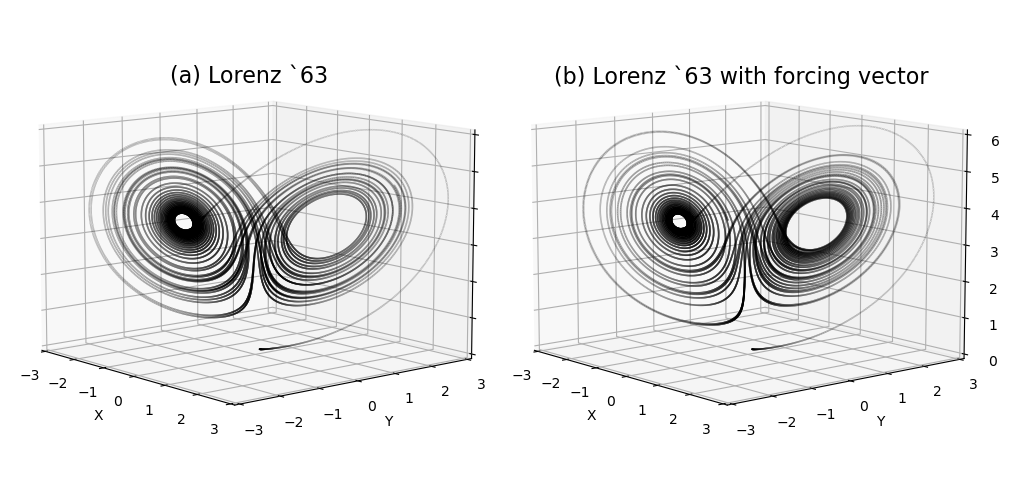

In [87]:
# Visualize the strange attractor in 3D
x_rawn = x_raw/x_raw.std()
y_rawn = y_raw/y_raw.std()
z_rawn = z_raw/z_raw.std()

x_rawn_f = x_raw_f/x_raw_f.std()
y_rawn_f = y_raw_f/y_raw_f.std()
z_rawn_f = z_raw_f/z_raw_f.std()

elev = 10
azim = -40
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)

fig = plt.figure(figsize=(10, 8))

#fig, axs = plt.subplots(2, 1, layout="constrained")

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_rawn, y_rawn, z_rawn, c='k', s=0.05, alpha=0.3)  # Adjust s for point size
ax1.view_init(elev=elev, azim=azim)
ax1.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax1.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax1.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.zaxis.set_tick_params(labelbottom=False)
ax1.set_title('(a) Lorenz `63', y=0.9, fontsize=16)


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_rawn_f, y_rawn_f, z_rawn_f, c='k', s=0.05, alpha=0.3)  # Adjust s for point size
ax2.view_init(elev=elev, azim=azim)
ax2.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax2.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax2.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('(b) Lorenz `63 with forcing vector', y=0.9, fontsize=16)



plt.tight_layout()
plt.show()

Again, you are encouraged to play around. But as before, we really need a long simulation to get stable statistics, so let's now look at it using the pre-computed data.

The forcing arrow here is pointing to the right, following the set-up of Corti, Molteni and Palmer (1999): https://doi.org/10.1038/19745

In [8]:
data_forced = np.load('./data/r4_0_L63.npy')[5000:50000+5000,:]

x_forced = data_forced[:,0]
y_forced = data_forced[:,1]
z_forced = data_forced[:,2]

xn_forced= x_forced/x_forced.std()
yn_forced= y_forced/y_forced.std()
zn_forced= z_forced/z_forced.std()

In [45]:
# Compute the proportion of time spent in the right wing for the unforced and forced system.
# The proportion of time spent in the left wing is, obviously, just 1 minus this.

R = 100*(x>0).sum()/len(x)
R_forced = 100*(x_forced>0).sum()/len(x_forced)

# Printing the percentages
print('Percentage of time spent in right wing for unforced L63: %.1f %%' % R)
print('Percentage of time spent in right wing for forced L63:   %.1f %%' % R_forced)

Percentage of time spent in right wing for unforced L63: 47.3 %
Percentage of time spent in right wing for forced L63:   63.8 %


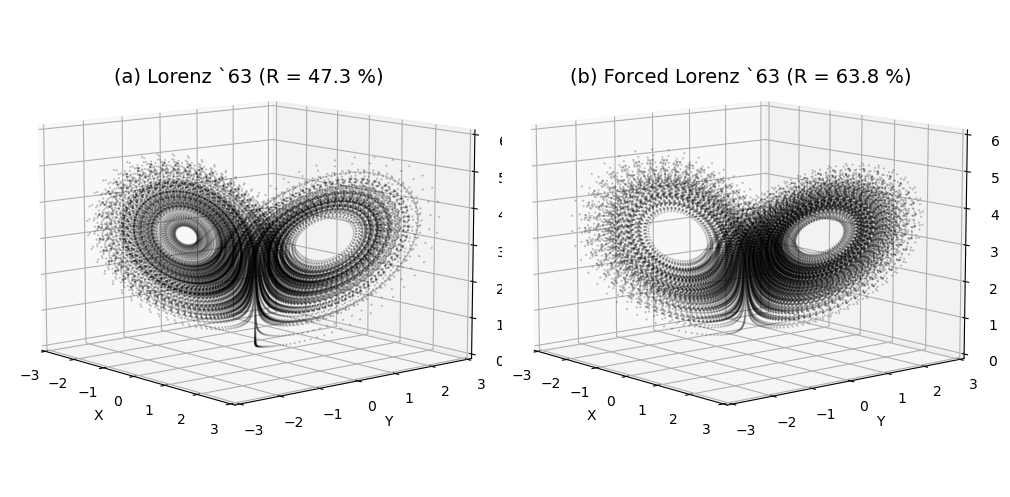

In [46]:
# You can see the difference by eye.


fig = plt.figure(figsize=(10, 8))

s = 0.4
a = 0.2
N = 30000 #extracting just a subset for visual clarity

elev = 10
azim = -40
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)


ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(xn[:N], yn[:N], zn[:N], c='k', s=s, alpha=a)  # Adjust s for point size
ax1.view_init(elev=elev, azim=azim)
ax1.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax1.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax1.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
#ax1.zaxis.set_tick_params(labelbottom=False)
ax1.set_title('(a) Lorenz `63 (R = %.1f %%)' % R, y=0.9, fontsize=14)


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(xn_forced[:N], yn_forced[:N], zn_forced[:N], c='k', s=s, alpha=a)  # Adjust s for point size
ax2.view_init(elev=elev, azim=azim)
ax2.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax2.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax2.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('(b) Forced Lorenz `63 (R = %.1f %%)' % R_forced, y=0.9, fontsize=14)

plt.tight_layout()
plt.show()

# 4. Forecasts and predictability

Let's take a look at making forecasts of the system.

In [137]:
''' Function which will do the following:

 * Generate a basic trajectory X_truth of the forced system from some initial condition. This will be the 'truth'.
 * Generate an ensemble forecast of X_truth. Each ensemble member will be initiated at an initial condition which 
   deviates slightly from the initial condition, reflecting the presence of some forecast error.
   
 num_mems = number of ensemble members
 
 error = the magnitude of the forecast error (i.e. how big the deviation of forecast initial conditions are
         from the real initial condition of X_truth)
         
 forcing_magnitude = magnitude of forecast vector (set to 0 for unforced system)
 
 length = how many timesteps to integrate for

'''
def generate_ensemble_forecast(initial_conditions, num_mems=20, error=0.01, forcing_magnitude=0, length=10000):
    
    # Time span
    t_span = (0, 40)
    t_eval = np.linspace(*t_span, 10000) #Take a long trajectory to ensure the timestep is sensible. Then subset

    # Calculate the forcing vector
    theta = 9  # 90 degrees
    #forcing_magnitude = 4
    forcing = [forcing_magnitude * np.cos(np.radians(theta)),
           forcing_magnitude * np.sin(np.radians(theta)),
           0]

    # First generate our truth X_truth
    true_sol = solve_ivp(lorenz63_with_forcing, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta, forcing))

    x_true = true_sol.y[0]
    y_true = true_sol.y[1]
    z_true = true_sol.y[2]
    
    # Now generate our ensemble forecast
    x_ens = []
    y_ens = []
    z_ens = []
    
    for n in range(num_mems):
        initial_conditions_fcst = initial_conditions + np.random.normal(0,error,3)
        mem_sol = solve_ivp(lorenz63_with_forcing, t_span, initial_conditions_fcst, t_eval=t_eval, args=(sigma, rho, beta, forcing))
        x_mem = mem_sol.y[0]
        y_mem = mem_sol.y[1]
        z_mem = mem_sol.y[2]
        
        x_ens.append(x_mem)
        y_ens.append(y_mem)
        z_ens.append(z_mem)
        
    x_ens = np.array(x_ens)
    y_ens = np.array(y_ens)
    z_ens = np.array(z_ens)
    
    return x_true[:length], y_true[:length], z_true[:length], x_ens[:,:length], y_ens[:,:length], z_ens[:,:length]

In [138]:
# I've picked an initial condition I know is on the attractor, close to the central region.
initial_conditions = [-1.6967147811644585, -1.991749152068955, 17.645205191961665] 

x_true, y_true, z_true, x_ens, y_ens, z_ens = generate_ensemble_forecast(initial_conditions, num_mems=20, error=0.01, forcing_magnitude=0)



In [139]:
# Compute the ensemble mean and spread of the forecast
x_ensmean = x_ens.mean(axis=0)
y_ensmean = y_ens.mean(axis=0)
z_ensmean = z_ens.mean(axis=0)

# Spread = 2 standard deviations of ensemble
x_spread = [2*x_ens[:,k].std() for k in range(x_ensmean.shape[0])]
y_spread = [2*y_ens[:,k].std() for k in range(y_ensmean.shape[0])]
z_spread = [2*z_ens[:,k].std() for k in range(z_ensmean.shape[0])]


We'll just look at forecasts of the x variable here.

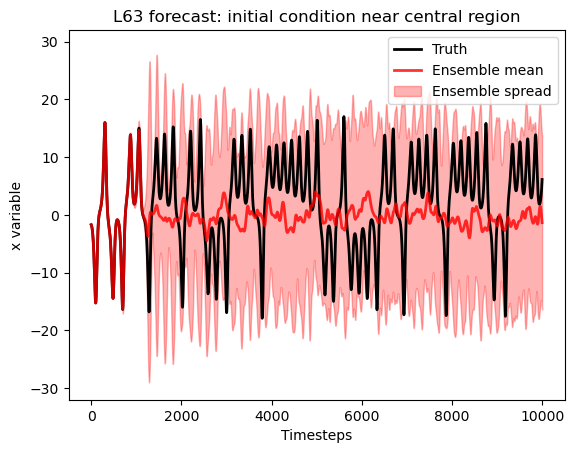

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x_true, 'k-', lw=2., label='Truth')
plt.plot(x_ensmean, 'r-', lw=2, label='Ensemble mean', alpha=0.8)
plt.fill_between(range(x_ensmean.shape[0]), x_ensmean-x_spread, x_ensmean+x_spread, color='r', alpha=0.3, label='Ensemble spread')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('x variable')
plt.ylim([-32,32])
plt.title('L63 forecast: initial condition near central region')
plt.show()

You can see it does well for a while, but at some point the exponential growth of errors catches up and the ensemble spread blows up, encompassing the entire range of the distribution. At this point the ensemble mean forecast has no skill.

Let's stick all that together so you can test different initial conditions and other tweaks.

In [141]:
def plot_forecast(initial_conditions, num_mems=20, error=0.01, forcing_magnitude=0, length=1000):
    
    x_true, y_true, z_true, x_ens, y_ens, z_ens = generate_ensemble_forecast(initial_conditions, num_mems=num_mems, error=error, forcing_magnitude=forcing_magnitude, length=length)
    x_ensmean = x_ens.mean(axis=0)
    y_ensmean = y_ens.mean(axis=0)
    z_ensmean = z_ens.mean(axis=0)

    x_spread = [2*x_ens[:,k].std() for k in range(x_ensmean.shape[0])]
    y_spread = [2*y_ens[:,k].std() for k in range(y_ensmean.shape[0])]
    z_spread = [2*z_ens[:,k].std() for k in range(z_ensmean.shape[0])]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.plot(x_true, 'k-', lw=2., label='Truth')
    plt.plot(x_ensmean, 'r-', lw=2, label='Ensemble mean', alpha=0.8)
    plt.fill_between(range(x_ensmean.shape[0]), x_ensmean-x_spread, x_ensmean+x_spread, color='r', alpha=0.3, label='Ensemble spread')
    plt.legend()
    plt.xlabel('Timesteps')
    plt.ylabel('x variable')
    plt.ylim([-32,32])
    plt.title('L63 forecast')
    plt.show()
    

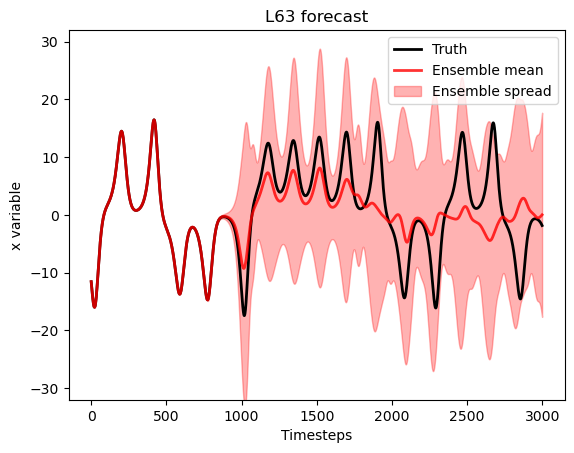

In [146]:
# Starting from one of the wings this time
initial_conditions = [-11.559622803137938, -19.058763804790846, 19.83806491861106] 
plot_forecast(initial_conditions, num_mems=20, error=0.01, forcing_magnitude=0, length=3000)

Notice here that the ensemble mean forecast remains a better forecast than any single member for a while, even as the ensemble spread becomes large. This reflects the fact that certain transitions are more or less likely. For example, you are unlikely to stay on a given wing for ages, so if you've predicted well that you stay in one wing (as in time steps 1000-1500 in the above plot) then a sensible forecast would be to predict a transition. The ensemble mean starts the transition slightly early (the 'truth' goes one last time around the wing first) but still does a decent job!

## Exercise 3. Ensemble forecasts

Explore different initial conditions, ensemble size, initial error. Are forecasts of other variables (y and z) different? 

Note that to find various initial conditions, you can just look at a long trajectory and then eyeball the correct index K for which [x[K], y[K], z[K]] gives the right initial condition.

## Exercise 4. Regime forecasts

Now suppose the forcing vector is non-zero (set forcing_magnitude=4). The most basic regime forecast for the long-term behaviour in this setting would now be based on x spending some proportion of time above and below zero depending on the forcing. Intuitively, this will be a worse forecast than the basic ensemble mean for short time intervals, but when the ensemble spread has exploded we might expect it to do better.

In this open-ended exercise, you are invited to explore this intuition by coding up a regime forecast function and comparing it to the ensemble mean forecast. The answer will be a function of what "long-term behaviour" means. This basically means that some amount of time averaging is taking place: you can use the running_mean function from earlier to do this. Your comparison between the basic forecast and the regime forecast will depend on the averaging value used.

# 5. Other dynamical systems properties

Let's look at the local dimension and persistence of the system, as defined in Faranda et al. 2017: https://www.nature.com/articles/srep41278

We'll use metrics compiled courtesy of Fabrizio Falasca and Yoann Robin. These implement the maths discussed in Faranda et al.

NB! These computations are kinda intensive. My notebook crashed when trying to run on all 50k points, which is why I subsampled 20k points below. Please tweak numbers if needed.

In [25]:
import metrics as metrics

X_red = X.T[:20000] #reduced samples
num_cores = 3 #number of cores available for computation on your computer

localDim, theta = metrics.indicators(X_red, Y=None, metric="euclidean", q=0.98, n_jobs=num_cores, pareto_fit="scipy", theta_fit="sueveges", distXY=None)

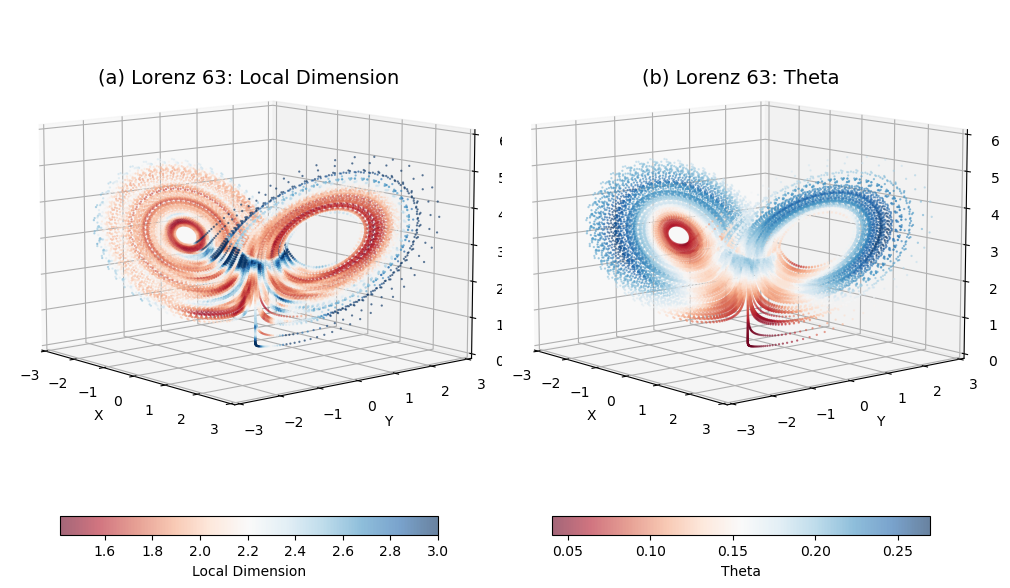

In [40]:
fig = plt.figure(figsize=(10, 8))


s = 0.4
a = 0.6
N = 20000

elev = 10
azim = -40
xlims = (-3,3)
ylims = (-3,3)
zlims = (0,6)


ax1 = fig.add_subplot(121, projection='3d')
p1 = ax1.scatter(xn[:N], yn[:N], zn[:N], c=localDim, s=s, cmap=plt.cm.RdBu, alpha=a, vmax=3)  # Adjust s for point size
ax1.view_init(elev=elev, azim=azim)
ax1.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax1.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax1.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
#ax1.zaxis.set_tick_params(labelbottom=False)
ax1.set_title('(a) Lorenz 63: Local Dimension', y=0.9, fontsize=14)
cb1 = plt.colorbar(p1,fraction=0.026, pad=0.04, orientation='horizontal')
cb1.set_label('Local Dimension')

ax2 = fig.add_subplot(122, projection='3d')
p2 = ax2.scatter(xn[:N], yn[:N], zn[:N], c=theta, s=s, cmap=plt.cm.RdBu, alpha=a)  # Adjust s for point size
ax2.view_init(elev=elev, azim=azim)
ax2.set_xlim(xmin=xlims[0],xmax=xlims[1])
ax2.set_ylim(ymin=ylims[0],ymax=ylims[1])
ax2.set_zlim(zmin=zlims[0],zmax=zlims[1])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('(b) Lorenz 63: Theta', y=0.9, fontsize=14)
cb2 = plt.colorbar(p2,fraction=0.026, pad=0.04, orientation='horizontal')
cb2.set_label('Theta')


plt.tight_layout()
plt.show()

Recall that theta = 1/persistence, so high theta = low persistence. 

We see that in the dense central region the local dimension is generally higher, reflecting the fact that the system can easily end up going either to the left or right wing subject to tiny perturbations. On the other hand, once it's on a given wing it has a lot less choice, since it has to go around the entire wing, and hence the local dimension drops. I'm not sure what's happening on the outermost edges (sampling variability?).

For persistence, we see that low theta/high persistence occurs near the centre of the wings, reflecting the presence of fixed points. However, in general the trajectories move quickly around the wings, as you will have seen playing with the interactive website.

## Exercise 5. Relationship with forecasts.

How does this info compare with the intuition gained from playing with ensemble forecasts? Try initialising forecasts from different regions corresponding to high/low local dimension and high/low theta.


# 6. Persistent homology

For computing persistent homology of the Lorenz 63 system, look at Theo's tutorial! Or try it yourself :-)